In [1]:
"""
1. Describe clustering + sample algorithms
    Samples: K Means algorithm, Gaussian, BayesianGaussian
    Description: Clustering is the iterative and automatic method of dividing a certain dataset into meaningful groups
    of datapoints. The goal is therefore to identify the underlaying patterns and number of clusters. The chosen algorithm
    will determine how well the the instances are matched to the clusters, based on the density distrubtion and shape
    of the cluster.

2. Application of clustering
    - clustering can be used to segmentate customer groups, create product recommendations or optimize search results
    - in computer vision, clustering might be used to connect pixcels to a certain object
    - we can reconstruct the underlying creation mechanisms of datapoints
    - the ability to detect subtle patterns in uncomprehensible data dimensions plays a big role in data mining
    - the ability to detect outliers can be used for fraud detection, quality control and dataprocessing for other machine
    learning algorithms, e.g. normalizing the data and cut off outliers

3. Two techniques to determine the proper number of clusters for k means
    - knowledge about the dataset --> (or) if possible, visualizing the data and visually detect the number of clusters
    - have a look at the silhouette and sluggishness functions and detect the "elbow" --> indicator of proper n

4. What is label propagation and why would someone implement it?
    Label propagation (semi-supervised learning) describes techniques to manually feed labels to the clustering algorithm. Usually,
    clustering algorithms don't hold information about the labels, they just identify how many groups/clusters there are given the data (multiple
    groups can belong to the same label, e.g., MNIST dataset!). If we already know the targets/labels we can assign certain clusters
    to labels, or if the borders between the clusters are fuzzy, we can assign labels within a certain confidence range (e.g., >80%).
    Special outliers could also be manually assigned to increase the fit of the model.
    Label propagation plays a huge role if individual label assignment is laborious or expensive (if it must be done by experts). 

5. Two algorithms for high volume data and two for detecting areas with high density.

6. Application example for active learning?
    Active learning would be used for slightly increasing the performance of a model by, e.g., labelling datapoints where the mode is uncertain.
    This could be used in all mentioned application fields, especially where minor/subtle differences in the data may lead to a mayor sig-
    nificance, such as quality control. We find this when there are a lot of unlabeled instances but labelling manually is expansive. The
    algorithm therefore decides which labels, if known, would create the biggest impact on it's performance

7. Difference anomaly detection and novelty detection?
    Those terms are closely correlated because in both cases we are searching for outliers in the data, i.e., instances that don't really fit
    into any cluster. Anomalies, in general, are one-time outliers that don't fit any specific pattern or have already been labelled as such. 
    Novelty would mean that outlaying values start to accumulate and therefore form a new cluster that has a signifance for the user.

8. Gaussian Mixture Distribution: definition and application.
    Anomaly detection: algorithm is trained with outliers and is able to identify them as such.
    Novelty detection: algorithm is trained without outliers (clean) and should find those in new instances only.

9. Techniques to determine the correct amount of clusters for GaussianMixture.
    We have to functions from information theory: BIC and AIC, which follow a similar function graph. We want to minimize that function.

10-13 Application.

"""

'\n1. Describe clustering + sample algorithms\n    Samples: K Means algorithm, Gaussian, BayesianGaussian\n    Description: Clustering is the iterative and automatic method of dividing a certain dataset into meaningful groups\n    of datapoints. The goal is therefore to identify the underlaying patterns and number of clusters. The chosen algorithm\n    will determine how well the the instances are matched to the clusters, based on the density distrubtion and shape\n    of the cluster.\n\n2. Application of clustering\n    - clustering can be used to segmentate customer groups, create product recommendations or optimize search results\n    - in computer vision, clustering might be used to connect pixcels to a certain object\n    - we can reconstruct the underlying creation mechanisms of datapoints\n    - the ability to detect subtle patterns in uncomprehensible data dimensions plays a big role in data mining\n    - the ability to detect outliers can be used for fraud detection, quality c

In [1]:
from sklearn.datasets import fetch_olivetti_faces

face_data = fetch_olivetti_faces()

from joblib import dump
dump(face_data, "olivetti_faces_400_64x64.joblib")

['olivetti_faces_400_64x64.joblib']

In [2]:
from joblib import load

face_data = load("C:/Users/MaxB2/Documents/Machine_Is_Learning/olivetti_faces_400_64x64.joblib")
X = face_data["data"]
y = face_data["target"]


In [3]:
type(X)

numpy.ndarray

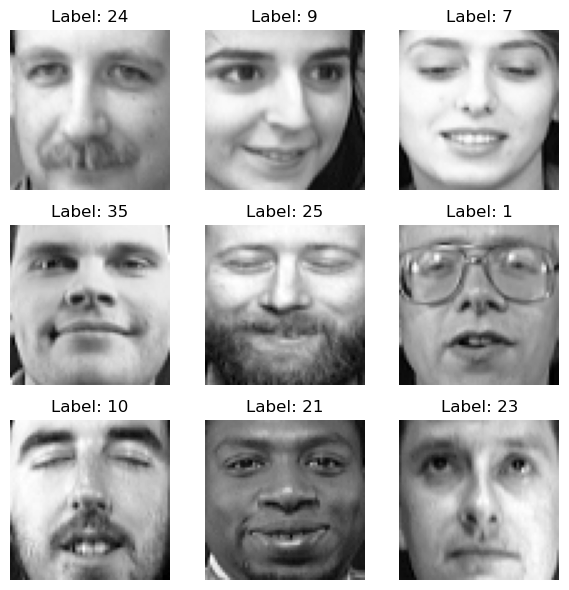

In [5]:
"""Number Demonstration"""
import matplotlib.pyplot as plt 
import random as rd
import numpy as np

indices = rd.sample(range(X.shape[0]), 9)  # Select 9 random indices

def plot_digits(indices, X, y):
    fig, axes = plt.subplots(3, 3, figsize=(6, 6))

    for i, ax in enumerate(axes.flat):
        image_array = np.array(X[indices[i]])
        digit_array = image_array.reshape(64, 64)
        negative_array = (-1) * digit_array  # Compute negative of the image
        #ax.imshow(negative_array, cmap="binary")
        ax.imshow(negative_array, cmap="binary")
        ax.axis("off")
        ax.set_title("Label: {}".format(y[indices[i]]))

    plt.tight_layout()
    plt.show()

plot_digits(indices, X, y)

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

sss1 = StratifiedShuffleSplit(n_splits=10, test_size=(1/5))

for train_index, test_index in sss1.split(X,y):
    X_trainA = X[train_index]
    y_trainA = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]


sss2 = StratifiedShuffleSplit(n_splits=10, test_size=(1/4))

for train_index, val_index in sss2.split(X_trainA,y_trainA):
    X_train = X_trainA[train_index]
    y_train = y_trainA[train_index]
    X_val = X_trainA[val_index]
    y_val = y_trainA[val_index]

import pandas as pd

ydf = pd.Series(y)
yvdf = pd.Series(y_val)
ytrdf = pd.Series(y_train)
ytsdf = pd.Series(y_test)

# The proportions of the income_cat groups are defined as the following fractions
total_digit_counts = ydf.value_counts() / len(y)
strat_validation_value_counts = yvdf.value_counts()/ len(X_val)
train_set_value_counts = ytrdf.value_counts()/ len(X_train)
test_set_value_counts = ytsdf.value_counts()/ len(X_test)

# Convert the Series object to a DataFrame with appropriate column names
df_comparison = pd.DataFrame({
    "Normal Data Proportion": total_digit_counts.values,
    "Validation Set Proportion": strat_validation_value_counts.values,
    "Train Set Proportion":train_set_value_counts.values,
    "Test Set Proportion":test_set_value_counts.values
})
df_comparison

Normal Data Proportion  Validation Set Proportion  Train Set Proportion  \
0                    0.025                      0.025                 0.025   
1                    0.025                      0.025                 0.025   
2                    0.025                      0.025                 0.025   
3                    0.025                      0.025                 0.025   
4                    0.025                      0.025                 0.025   
5                    0.025                      0.025                 0.025   
6                    0.025                      0.025                 0.025   
7                    0.025                      0.025                 0.025   
8                    0.025                      0.025                 0.025   
9                    0.025                      0.025                 0.025   
10                   0.025                      0.025                 0.025   
11                   0.025                      0.025                 0.025   
12                   0.025                      0.025                 0.025   
13                   0.025                      0.025                 0.025   
14                   0.025                      0.025                 0.025   
15                   0.025                      0.025                 0.025   
16                   0.025                      0.025                 0.025   
17                   0.025                      0.025                 0.025   
18                   0.025                      0.025                 0.025   
19                   0.025                      0.025                 0.025   
20                   0.025                      0.025                 0.025   
21                   0.025                      0.025                 0.025   
22                   0.025                      0.025                 0.025   
23                   0.025                      0.025                 0.025   
24                   0.025                      0.025                 0.025   
25                   0.025                      0.025                 0.025   
26                   0.025                      0.025                 0.025   
27                   0.025                      0.025                 0.025   
28                   0.025                      0.025                 0.025   
29                   0.025                      0.025                 0.025   
30                   0.025                      0.025                 0.025   
31                   0.025                      0.025                 0.025   
32                   0.025                      0.025                 0.025   
33                   0.025                      0.025                 0.025   
34                   0.025                      0.025                 0.025   
35                   0.025                      0.025                 0.025   
36                   0.025                      0.025                 0.025   
37                   0.025                      0.025                 0.025   
38                   0.025                      0.025                 0.025   
39                   0.025                      0.025                 0.025   

    Test Set Proportion  
0                 0.025  
1                 0.025  
2                 0.025  
3                 0.025  
4                 0.025  
5                 0.025  
6                 0.025  
7                 0.025  
8                 0.025  
9                 0.025  
10                0.025  
11                0.025  
12                0.025  
13                0.025  
14                0.025  
15                0.025  
16                0.025  
17                0.025  
18                0.025  
19                0.025  
20                0.025  
21                0.025  
22                0.025  
23                0.025  
24                0.025  
25                0.025  
26                0.025  
27                0.025  
28        

In [7]:
print(len(y_train))
print(len(y_test))
print(len(y_val))

240
80
80


In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [25]:
from sklearn.decomposition import PCA

pca = PCA(0.99)

X_train_r = pca.fit_transform(X_train)
X_test_r = pca.fit_transform(X_train)
X_val_r = pca.fit_transform(X_train)

c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

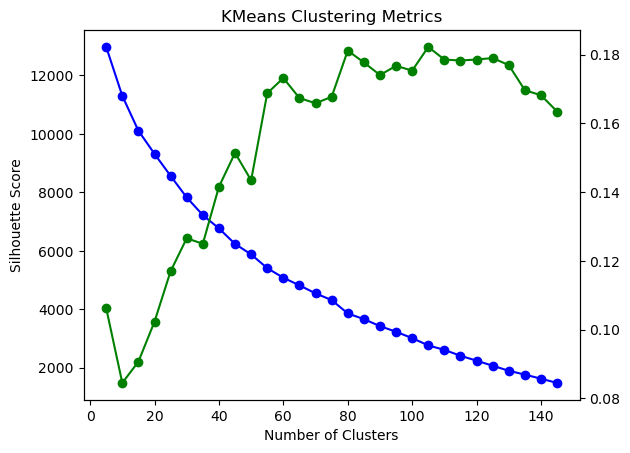

In [29]:

range_1 = range(5, 150, 5)

inertias = np.array([])
silhouette_scores = np.array([])

for k in range_1:
    km = KMeans(n_clusters=k,n_init=5)
    km.fit(X_train)
    inertias = np.append(inertias, km.inertia_)
    silhouette_scores = np.append(silhouette_scores, silhouette_score(X_train, km.labels_))
    

fig, ax1 = plt.subplots()

ax1.plot(range_1, inertias, "bo-", label="Inertia")
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Inertia")
ax1.tick_params(axis="y")

ax2 = ax1.twinx()
ax2.plot(range_1, silhouette_scores, "go-", label="Silhouette Score")
ax1.set_ylabel("Silhouette Score")
ax2.tick_params(axis="y")

plt.title("KMeans Clustering Metrics")
plt.show()

c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

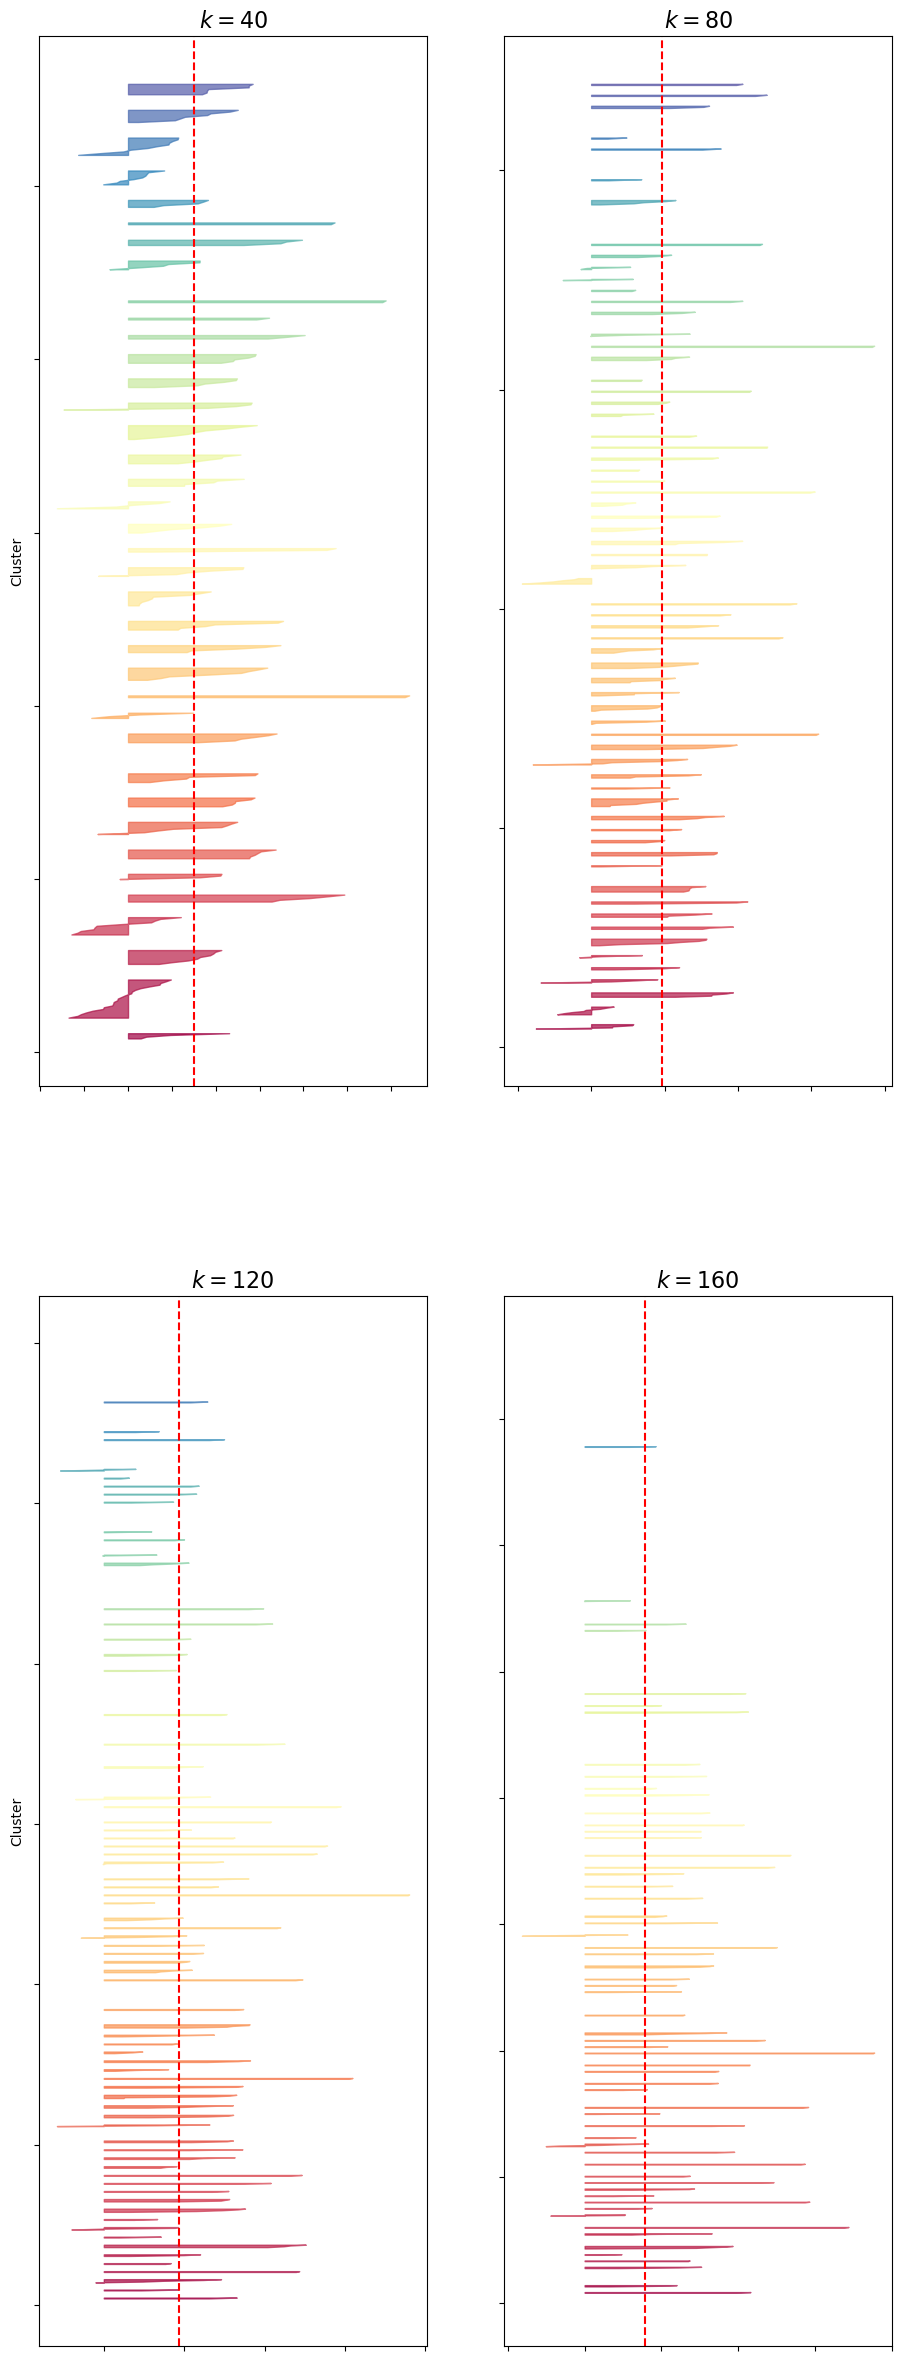

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

#kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
#                for k in range(1, 10)]
        
range_2 = (40,80,120,160)


plt.figure(figsize=(11, 30))

for k in range_2:
    plt.subplot(2, 2, range_2.index(k)+1)
    km = KMeans(n_clusters=k,n_init=5).fit(X_train)
    y_pred = km.labels_
    silhouette_coefficients = silhouette_samples(X_train, y_pred)

    padding = len(X_train) // 30
    pos = padding
    ticks = []
    coeffs_all = np.array([])

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        color = mpl.cm.Spectral(i / k)
        coeffs_all = np.append(coeffs_all,coeffs)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    #plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    #plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.gca().set_yticklabels([])
    if k in (40,120,200):
        plt.ylabel("Cluster")
    if k in (200,240):
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x= np.mean(coeffs_all), color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

plt.xscale
plt.show()

In [39]:
best_k = 80
best_km = KMeans(n_clusters=best_k,n_init=5)

best_km.fit(X_train)

c:\Users\MaxB2\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=80, n_init=5)

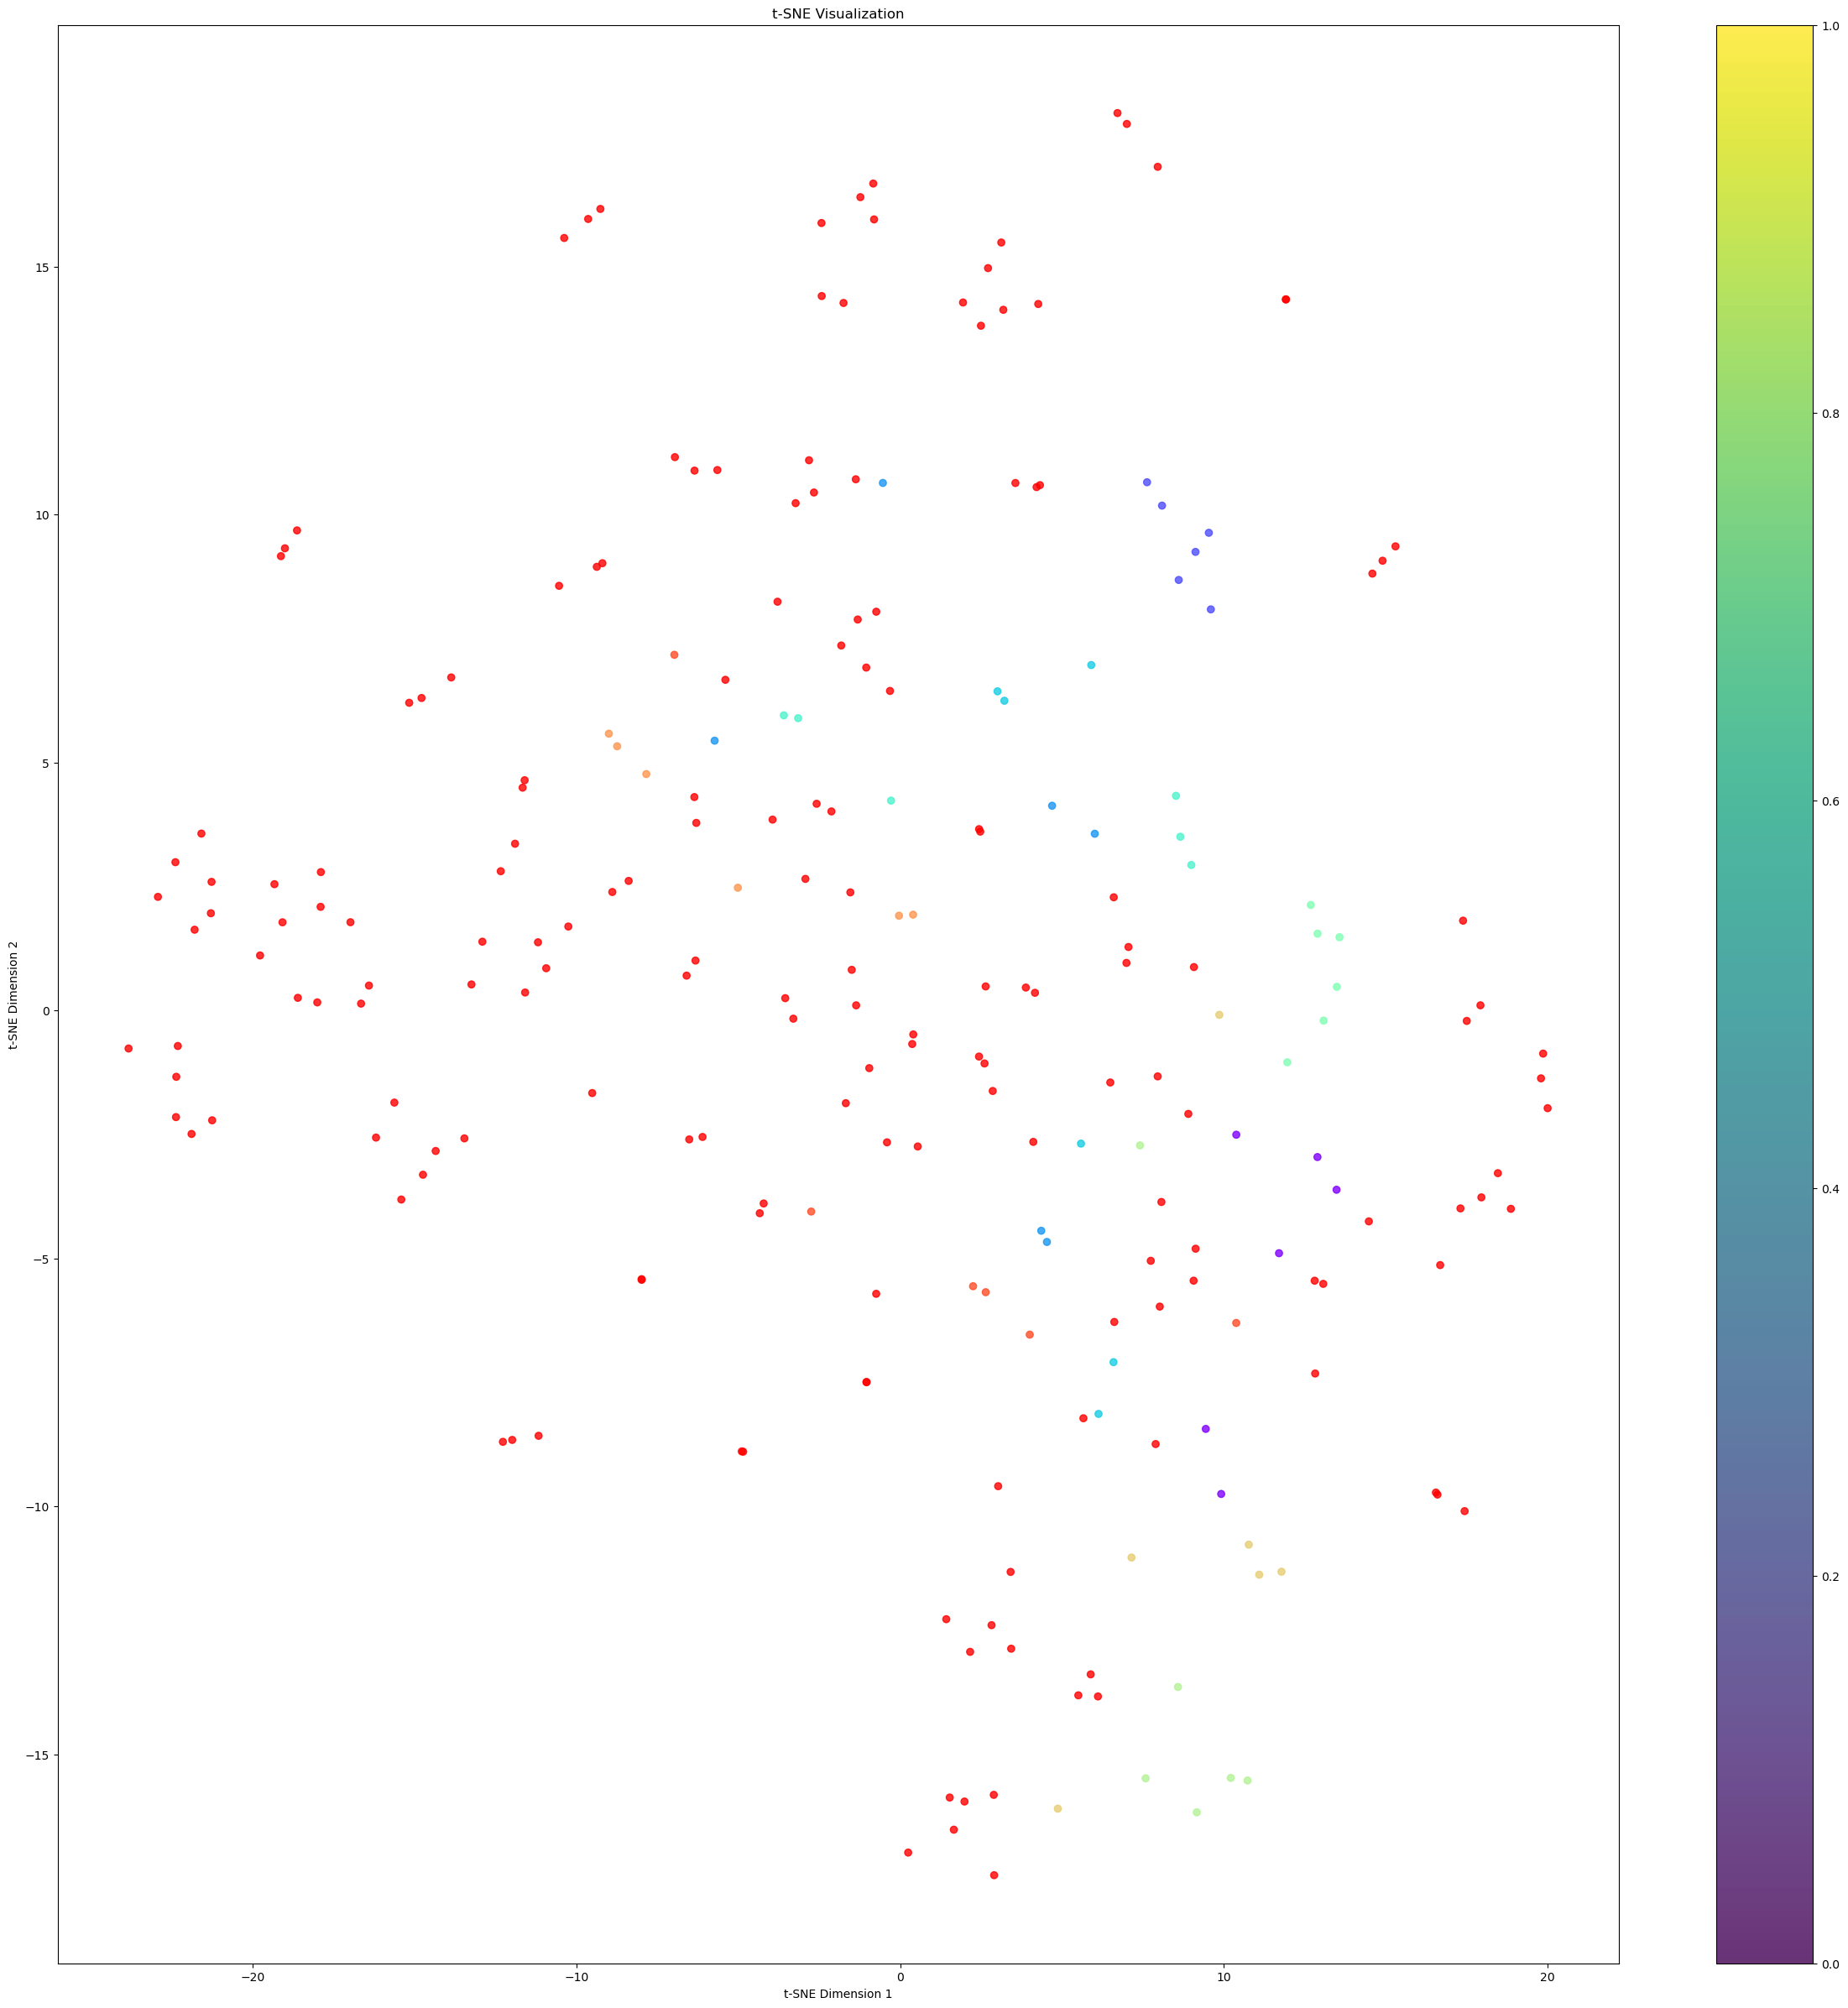

In [15]:
colors = plt.cm.rainbow(y_train / 10.0)
plt.figure(figsize=(30, 30))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],c=colors,alpha=0.8)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization')
plt.colorbar()
plt.show()

Cluster 0


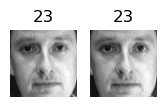

Cluster 1


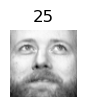

Cluster 2


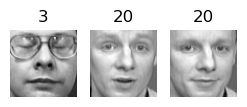

Cluster 3


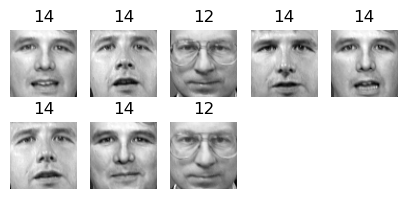

Cluster 4


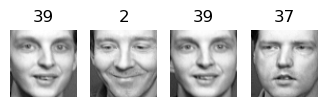

Cluster 5


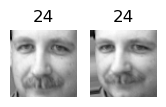

Cluster 6


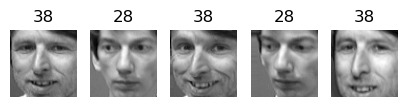

Cluster 7


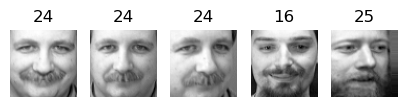

Cluster 8


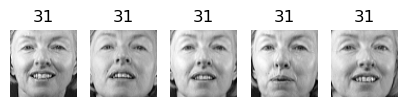

Cluster 9


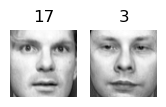

Cluster 10


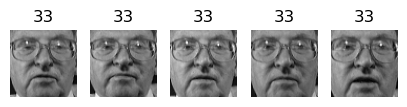

Cluster 11


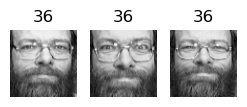

Cluster 12


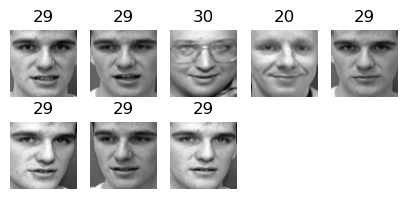

Cluster 13


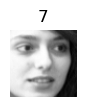

Cluster 14


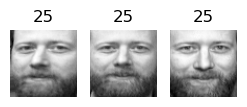

Cluster 15


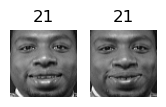

Cluster 16


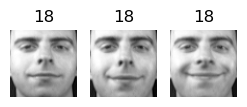

Cluster 17


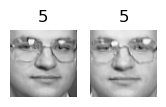

Cluster 18


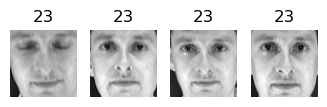

Cluster 19


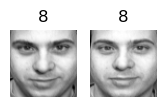

Cluster 20


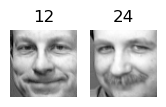

Cluster 21


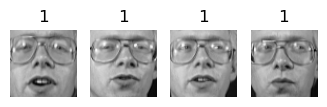

Cluster 22


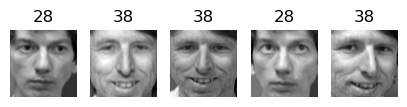

Cluster 23


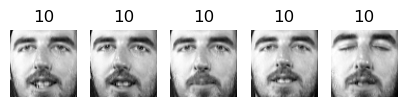

Cluster 24


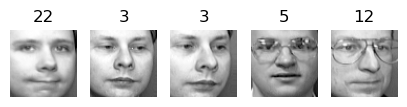

Cluster 25


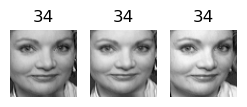

Cluster 26


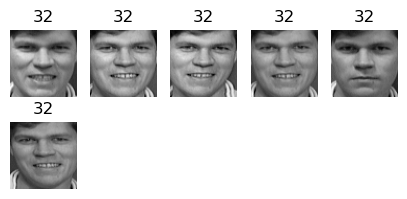

Cluster 27


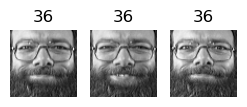

Cluster 28


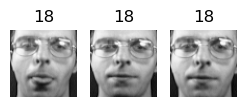

Cluster 29


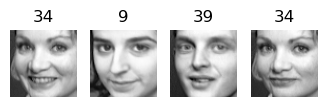

Cluster 30


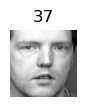

Cluster 31


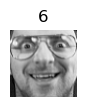

Cluster 32


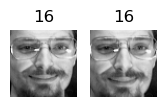

Cluster 33


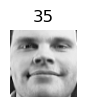

Cluster 34


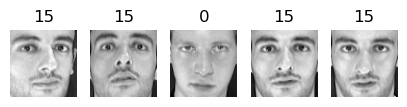

Cluster 35


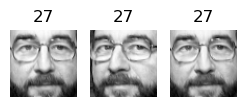

Cluster 36


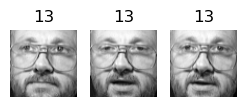

Cluster 37


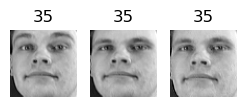

Cluster 38


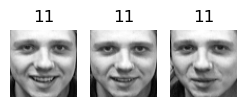

Cluster 39


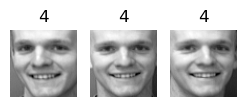

Cluster 40


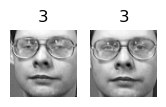

Cluster 41


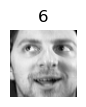

Cluster 42


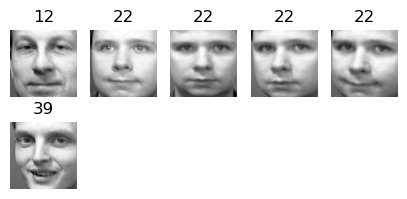

Cluster 43


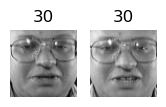

Cluster 44


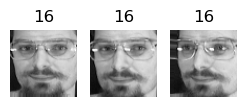

Cluster 45


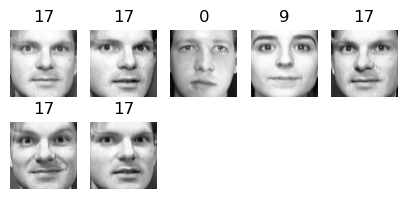

Cluster 46


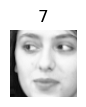

Cluster 47


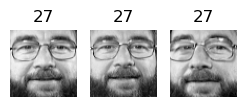

Cluster 48


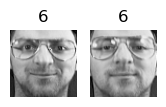

Cluster 49


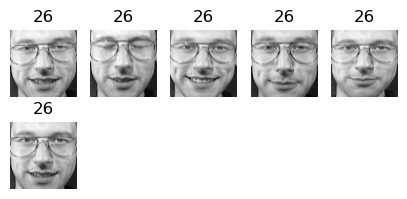

Cluster 50


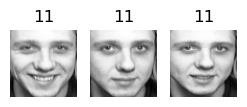

Cluster 51


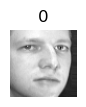

Cluster 52


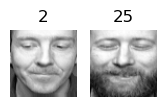

Cluster 53


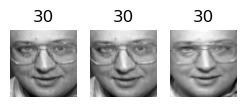

Cluster 54


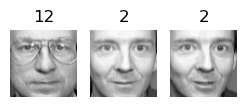

Cluster 55


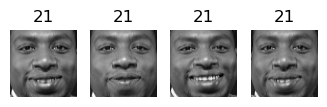

Cluster 56


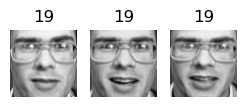

Cluster 57


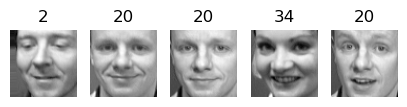

Cluster 58


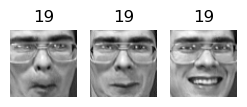

Cluster 59


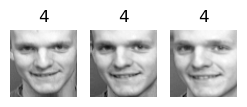

Cluster 60


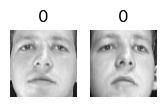

Cluster 61


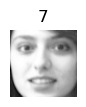

Cluster 62


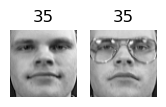

Cluster 63


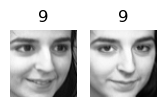

Cluster 64


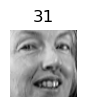

Cluster 65


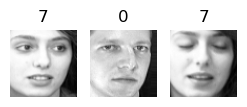

Cluster 66


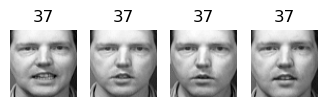

Cluster 67


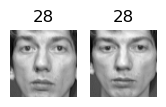

Cluster 68


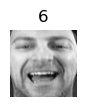

Cluster 69


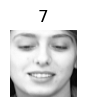

Cluster 70


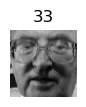

Cluster 71


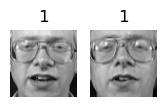

Cluster 72


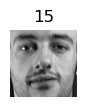

Cluster 73


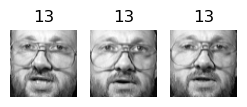

Cluster 74


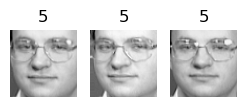

Cluster 75


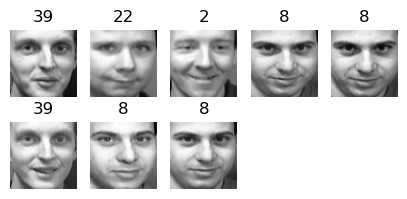

Cluster 76


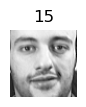

Cluster 77


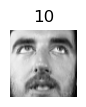

Cluster 78


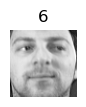

Cluster 79


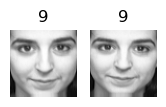

In [40]:
def plot_faces1(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_km.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_km.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces1(faces, labels)

C:\Users\MaxB2\AppData\Local\Temp\ipykernel_6984\2591947544.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


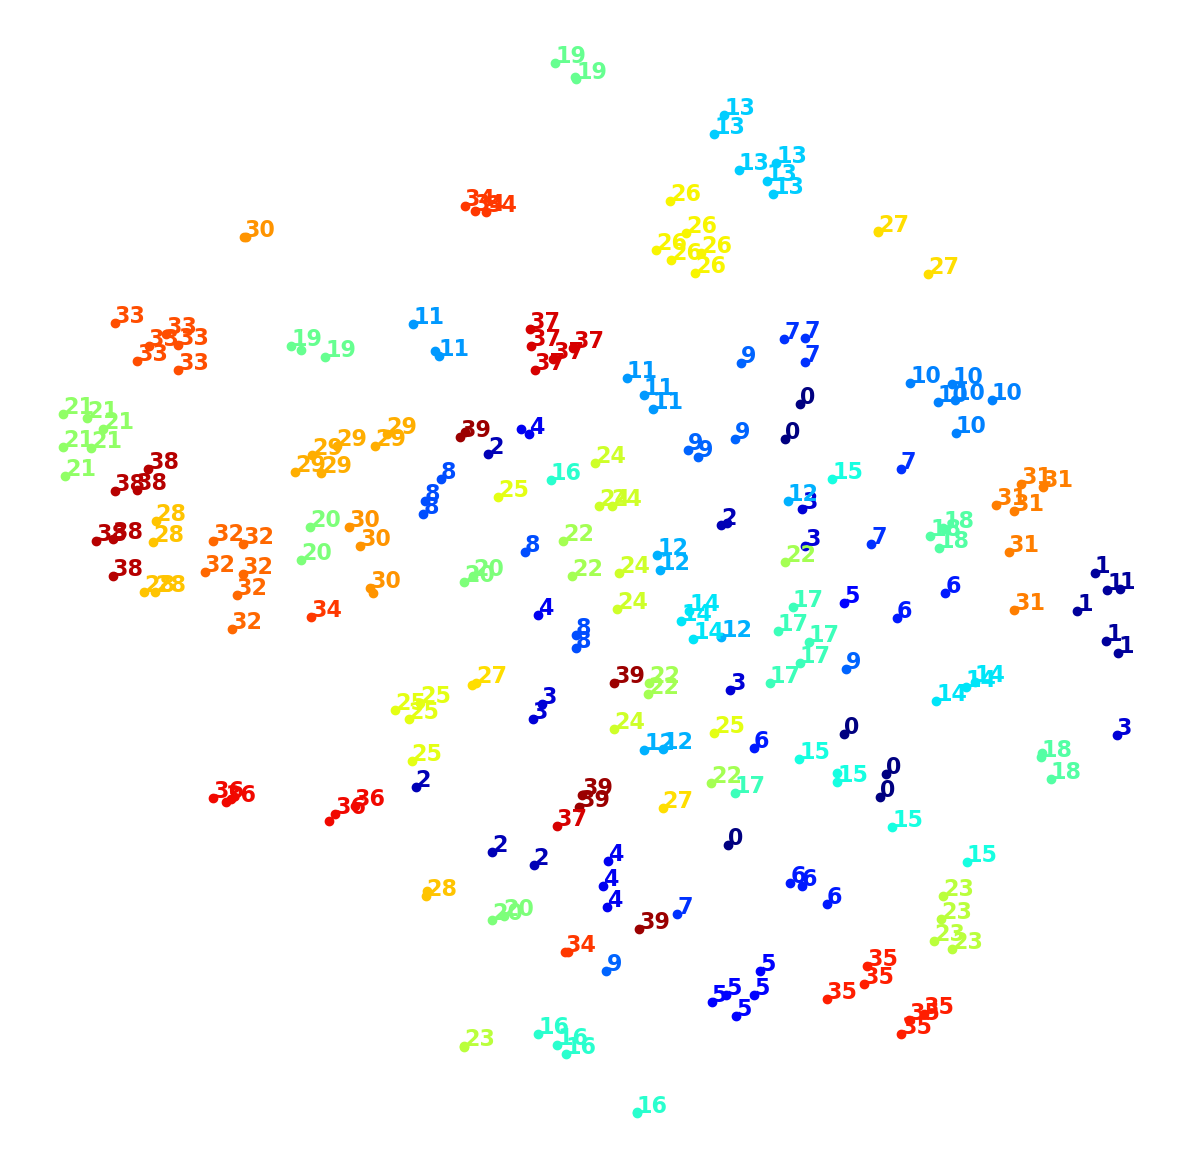

In [41]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib as mpl

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_train_r)

def plot_faces(X,y,min_distance=0.01,images=None,figsize=(15,15)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10.,10.]])
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y==digit,0],X_normalized[y==digit,1],c=[cmap(digit / 40)])
    plt.axis("off")
    ax = plt.gcf().gca()
    for index,image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors-image_coord,axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors,[image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 40), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(64,64)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

plot_faces(X_tsne, y_train)

C:\Users\MaxB2\AppData\Local\Temp\ipykernel_6984\2591947544.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


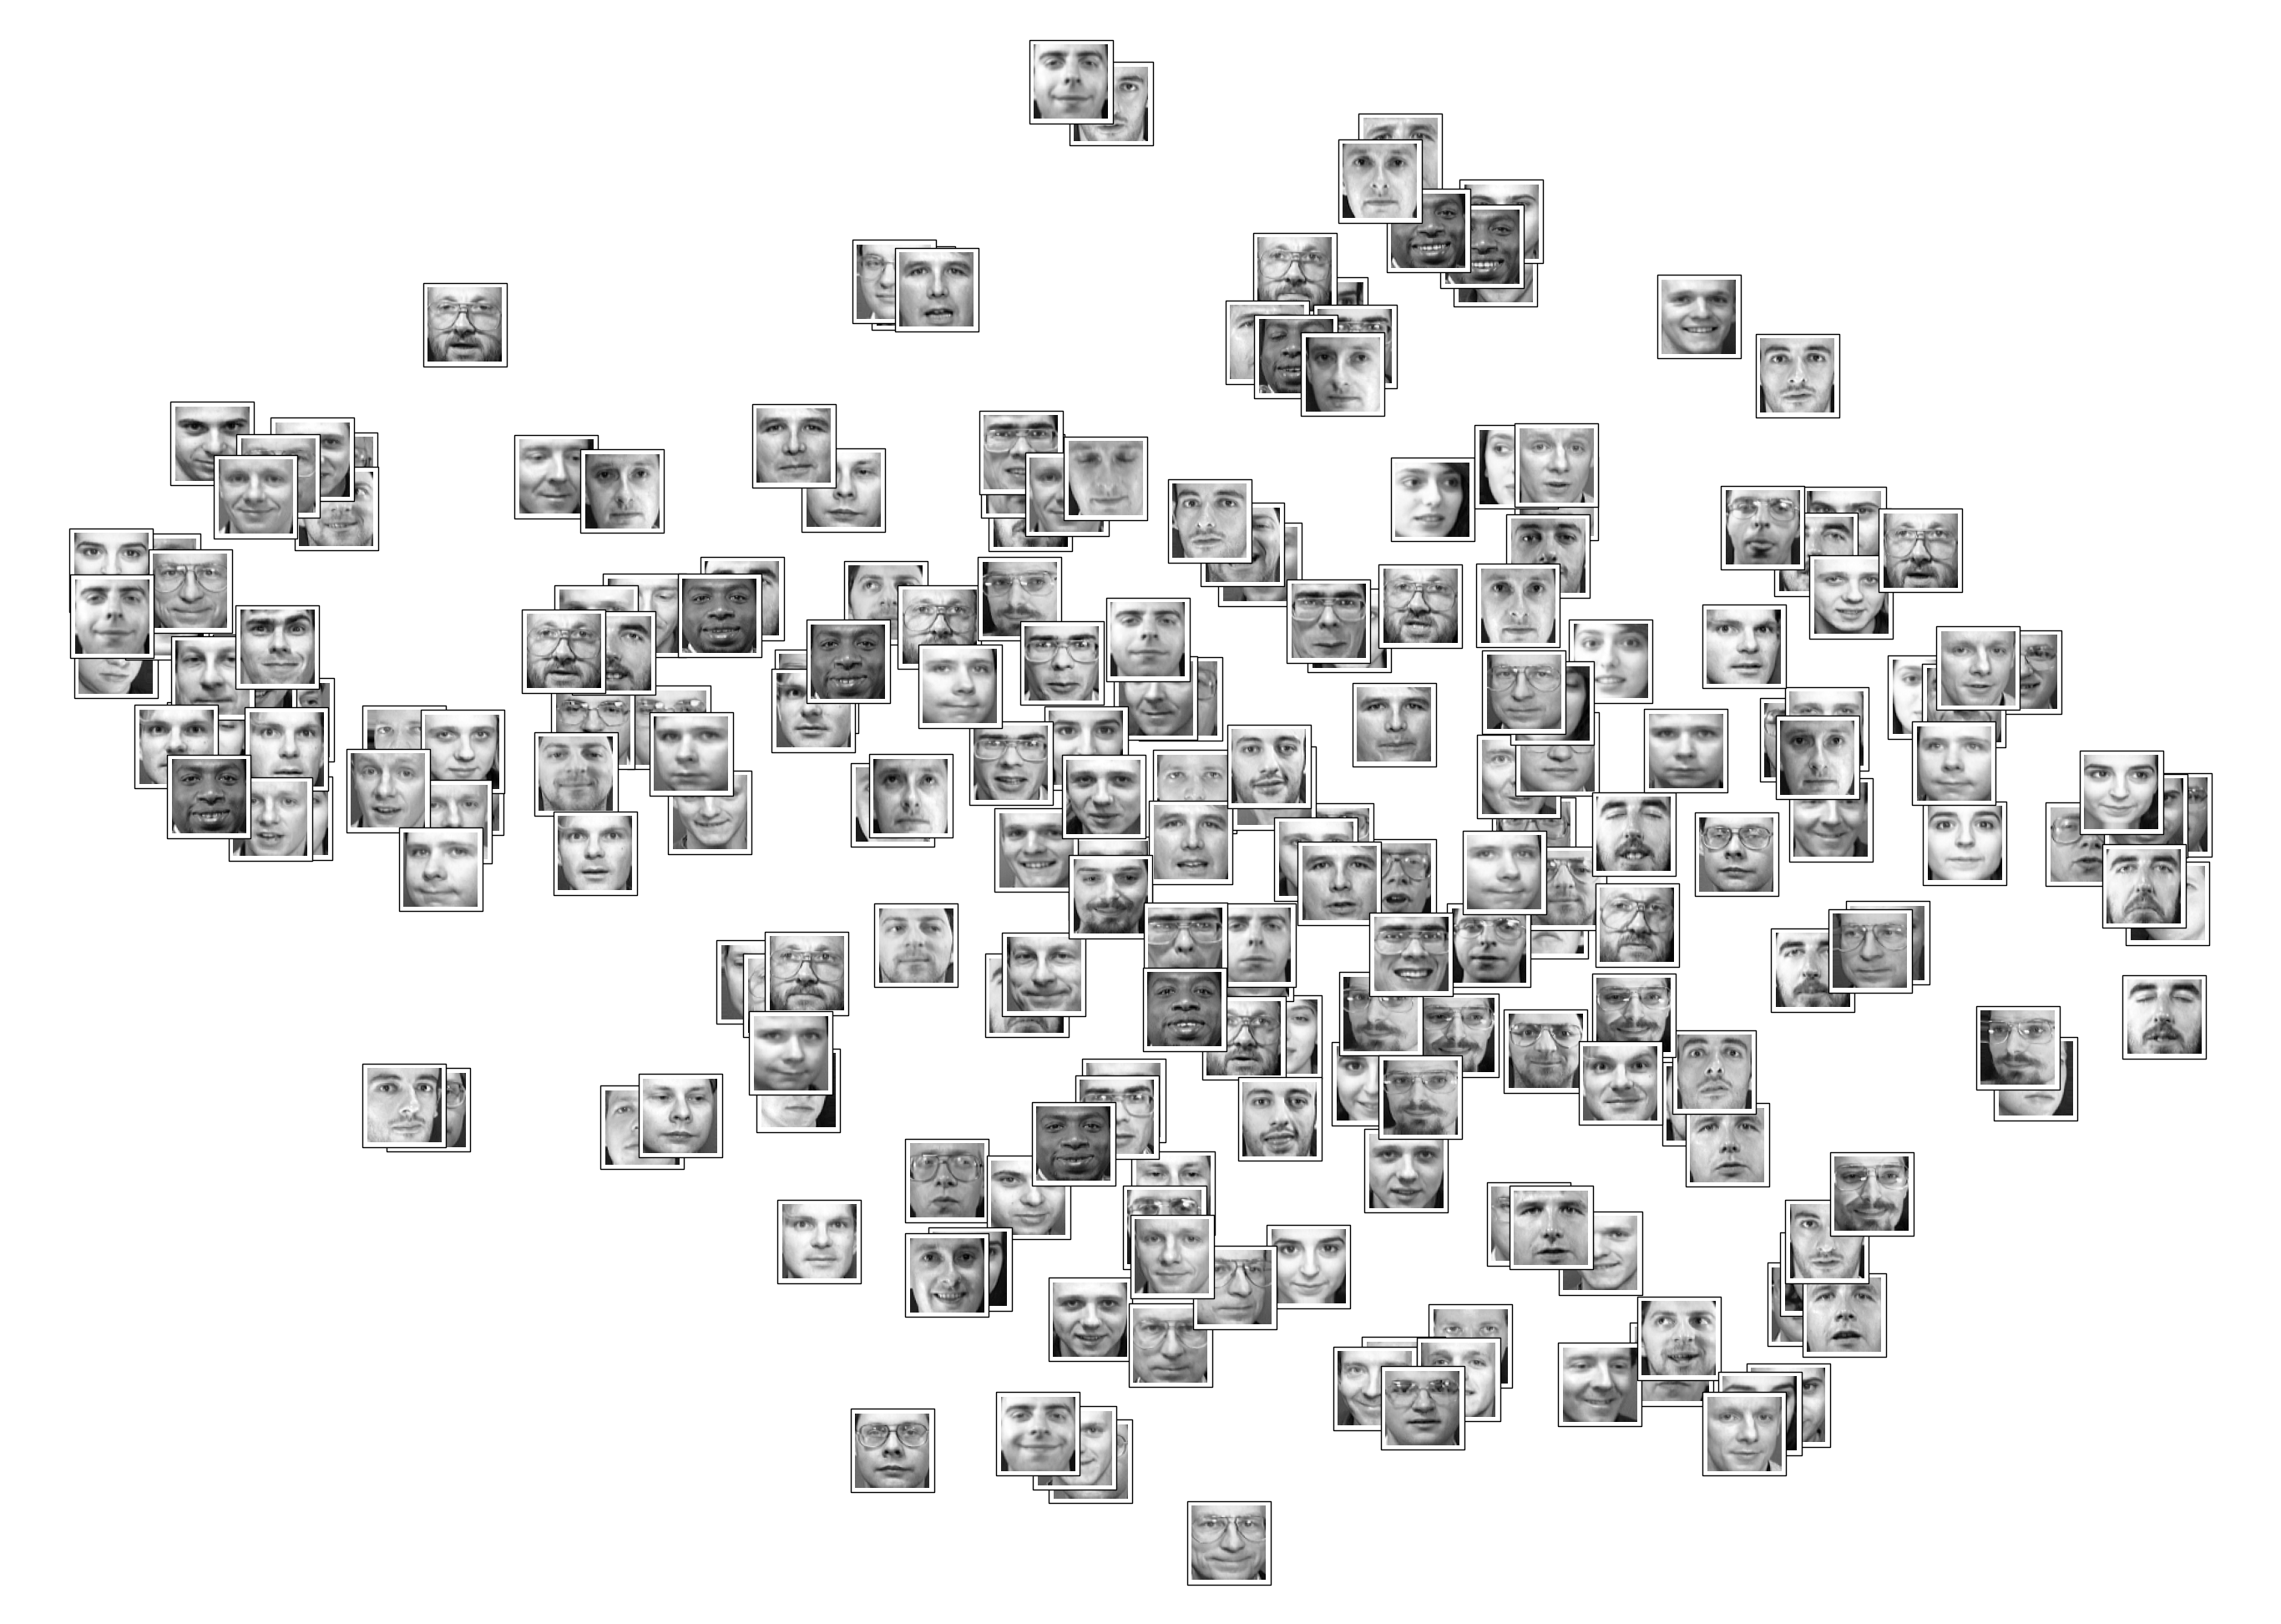

In [42]:
images_nn = (-1)*X

plot_faces(X_tsne, y_train, images=images_nn, figsize=(35, 25))

In [51]:
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_train_r)

def plot_faces3d(X,y,min_distance=0.05,images=None,figsize=(15,15)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10.,10.,10.]])
    plt.figure(figsize=figsize)
    # ax = fig.add_subplot(111, projection='3d')
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y==digit,0],X_normalized[y==digit,1],c=[cmap(digit / 40)])
    plt.axis("off")
    ax = plt.gcf().gca()
    for index,image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors-image_coord,axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors,[image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], image_coord[2], str(int(y[index])),
                         color=cmap(y[index] / 40), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(64,64)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)


plot_faces3d(X_tsne_3d, y_train, images=images_nn, figsize=(35, 25))

C:\Users\MaxB2\AppData\Local\Temp\ipykernel_6984\1981426690.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap("jet")


Traceback (most recent call last):
  File "c:\Users\MaxB2\anaconda3\lib\site-packages\matplotlib\backends\backend_qt.py", line 468, in _draw_idle
    self.draw()
  File "c:\Users\MaxB2\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 400, in draw
    self.figure.draw(self.renderer)
  File "c:\Users\MaxB2\anaconda3\lib\site-packages\matplotlib\artist.py", line 95, in draw_wrapper
    result = draw(artist, renderer, *args, **kwargs)
  File "c:\Users\MaxB2\anaconda3\lib\site-packages\matplotlib\artist.py", line 72, in draw_wrapper
    return draw(artist, renderer)
  File "c:\Users\MaxB2\anaconda3\lib\site-packages\matplotlib\figure.py", line 3125, in draw
    mimage._draw_list_compositing_images(
  File "c:\Users\MaxB2\anaconda3\lib\site-packages\matplotlib\image.py", line 131, in _draw_list_compositing_images
    a.draw(renderer)
  File "c:\Users\MaxB2\anaconda3\lib\site-packages\matplotlib\artist.py", line 72, in draw_wrapper
    return draw(artist, renderer)
  File